In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 as cv
from skimage import io
import joblib

In [2]:
from typing import Union

from collections import defaultdict
from itertools import combinations

from skimage.transform import resize
from skimage.measure import label, find_contours
from skimage.filters import gaussian
from skimage.feature import match_template
from scipy.ndimage import convolve
from scipy.spatial.distance import cdist
import scipy.stats as st
from sklearn.ensemble import RandomForestClassifier

# Solving

## Counting points

In [3]:
img1 = cv.imread('points/ghost.jpg',cv.IMREAD_GRAYSCALE)

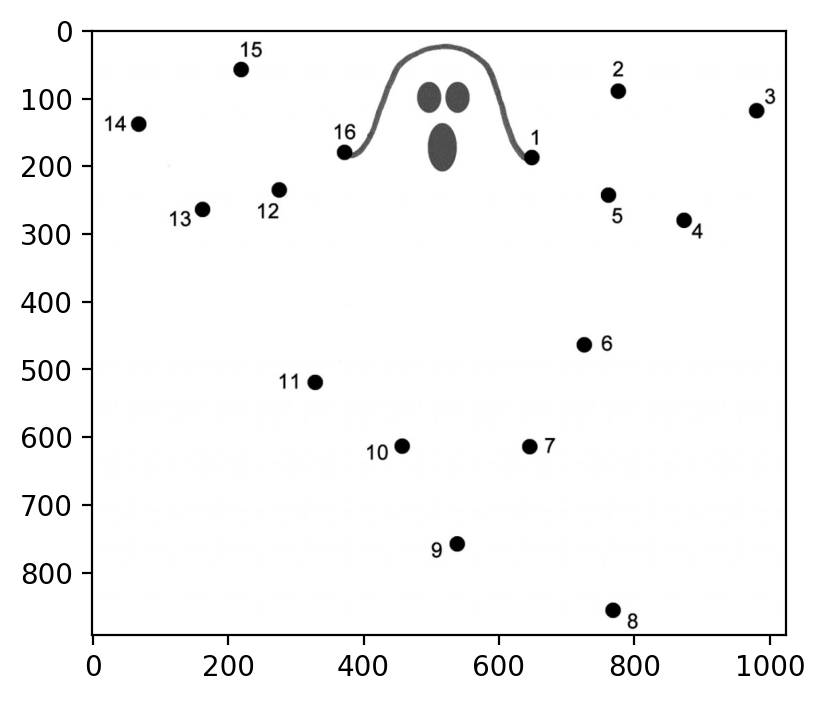

In [4]:
plt.figure(dpi=200)
plt.imshow(img1, cmap='gray')

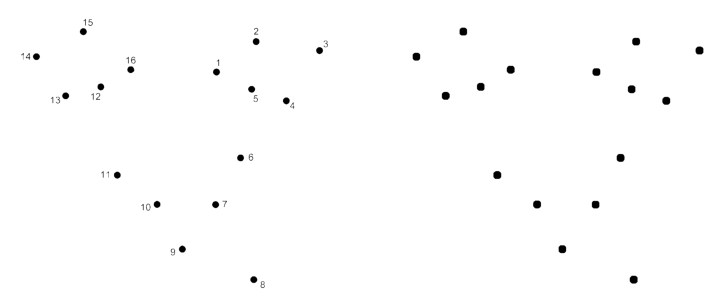

In [5]:
mask = img1 < 30
mask_int = mask.astype(np.uint8)
kernel = np.ones((7,7))
mask_int = cv.morphologyEx(mask_int, cv.MORPH_ERODE, kernel)
kernel = np.ones((11, 11))
mask_int = cv.morphologyEx(mask_int, cv.MORPH_DILATE, kernel)


plt.figure(dpi=150)
plt.subplot(1,2,1)   
plt.axis('off')
plt.imshow(1 - mask, cmap="gray")
plt.subplot(1,2,2)  
plt.axis('off')
plt.imshow(1 - mask_int, cmap="gray")

In [6]:
all_contours, hierarchy = cv.findContours(mask_int, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [7]:
len(all_contours)

16

In [8]:
areas = [cv.contourArea(cnt) for cnt in all_contours]

In [9]:
min_area = np.min(areas)

In [10]:
idxs = areas < (1.5 * min_area)

In [11]:
rev_centers = []
for cnt in all_contours:
    rev_centers.append(np.mean(cnt[:, 0, :], axis=0))
rev_centers = np.array(rev_centers)[idxs]

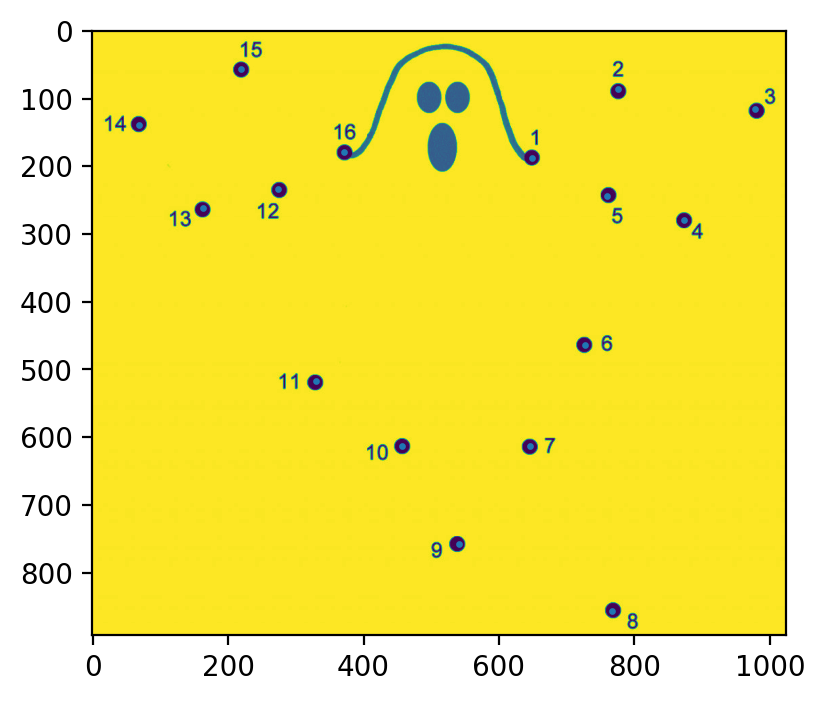

In [12]:
plt.figure(dpi=200)
plt.imshow(img1)
plt.scatter(rev_centers[:, 0], rev_centers[:, 1], s=2)

## Exctracting numbers near points

### Create training sample

In [13]:
train0 = []
for i in range(10):
    mask = np.ones((100, 100))
    d = i // 10
    cv.putText(mask, f"{i}", (33-23*d,75), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 3)
    contours, hierarchy = cv.findContours(mask.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    areas = np.array([cv.contourArea(cnt) for cnt in contours])
    cnt_id = np.argsort(areas)[-2]
    contour = contours[cnt_id][:, 0, :]
    xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
    ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
    mask = mask[ymin:ymax+1, xmin:xmax+1]
    train0.append(resize(mask, (28,28)).reshape(-1))
y0 = np.arange(10)

In [14]:
train1 = []
for i in range(10):
    mask = np.ones((100, 100))
    d = i // 10
    cv.putText(mask, f"{i}", (33-23*d,75), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 3)
    contours, hierarchy = cv.findContours(mask.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    areas = np.array([cv.contourArea(cnt) for cnt in contours])
    cnt_id = np.argsort(areas)[-2]
    contour = contours[cnt_id][:, 0, :]
    xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
    ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
    mask = mask[ymin:ymax+1, xmin:xmax+1]
    train1.append(resize(mask, (28,28)).reshape(-1))
y1 = np.arange(10)

In [15]:
train2 = []
for i in range(10):
    mask = np.ones((100, 100))
    d = i // 10
    cv.putText(mask, f"{i}", (33-23*d,75), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 3)
    contours, hierarchy = cv.findContours(mask.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    areas = np.array([cv.contourArea(cnt) for cnt in contours])
    cnt_id = np.argsort(areas)[-2]
    contour = contours[cnt_id][:, 0, :]
    xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
    ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
    mask = mask[ymin:ymax+1, xmin:xmax+1]
    train2.append(resize(mask, (28,28)).reshape(-1))
y2 = np.arange(10)

In [16]:
train3 = []
for i in range(10):
    mask = np.ones((100, 100))
    d = i // 10
    cv.putText(mask, f"{i}", (33-23*d,75), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 3)
    contours, hierarchy = cv.findContours(mask.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    areas = np.array([cv.contourArea(cnt) for cnt in contours])
    cnt_id = np.argsort(areas)[-2]
    contour = contours[cnt_id][:, 0, :]
    xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
    ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
    mask = mask[ymin:ymax+1, xmin:xmax+1]
    train3.append(resize(mask, (28,28)).reshape(-1))
y3 = np.arange(10)

In [17]:
train4 = []
for i in range(10):
    mask = np.ones((100, 100))
    d = i // 10
    cv.putText(mask, f"{i}", (33-23*d,75), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 3)
    contours, hierarchy = cv.findContours(mask.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    areas = np.array([cv.contourArea(cnt) for cnt in contours])
    cnt_id = np.argsort(areas)[-2]
    contour = contours[cnt_id][:, 0, :]
    xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
    ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
    mask = mask[ymin:ymax+1, xmin:xmax+1]
    train4.append(resize(mask, (28,28)).reshape(-1))
y4 = np.arange(10)

In [18]:
train5 = []
for i in range(10):
    mask = np.ones((100, 100))
    d = i // 10
    cv.putText(mask, f"{i}", (33-23*d,75), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 3)
    contours, hierarchy = cv.findContours(mask.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    areas = np.array([cv.contourArea(cnt) for cnt in contours])
    cnt_id = np.argsort(areas)[-2]
    contour = contours[cnt_id][:, 0, :]
    xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
    ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
    mask = mask[ymin:ymax+1, xmin:xmax+1]
    train5.append(resize(mask, (28,28)).reshape(-1))
y5 = np.arange(10)

In [19]:
areas = np.array([cv.contourArea(cnt) for cnt in all_contours])[idxs]
centers = rev_centers[::, ::-1]
mask = img1 < 50
train6 = []
for i, pt in enumerate(centers):
    pt = np.int32(pt)
    area = areas[i]
    rad = int(np.sqrt(area / np.pi))
    
    part = mask.copy()
    down, right = part.shape[0], part.shape[1]
    k = 1.5
    
    k = int(4 * k)
    part = part[np.max([0, pt[0]-k*rad]):np.min([down, pt[0]+k*rad]), np.max([0, pt[1]-k*rad]):np.min([right, pt[1]+k*rad])]
    down, right = part.shape[0], part.shape[1]
    lbl, n = label(part, connectivity=2, return_num=True)
    idx = lbl[down//2][right//2]
    
    lbl_areas = [np.sum(lbl == i) for i in np.unique(lbl)]
    idxs_to_remove = np.unique(lbl)[lbl_areas > 0.5 * area]
    part = (lbl - (np.isin(lbl, idxs_to_remove)) * lbl)
    pt = np.int16(np.round(np.mean(np.argwhere(lbl == idx), axis=0)))

    padd = 4
    new_part = np.zeros((part.shape[0]+padd, part.shape[1]+padd)).astype(bool)
    new_part[padd//2:-padd//2, padd//2:-padd//2] = part
    part = ~new_part.copy()
    
    kernel = np.ones((2,2))
    part = cv.morphologyEx(part.astype('uint8'), cv.MORPH_ERODE, kernel).astype(bool)
    contours, hierarchy = cv.findContours(part.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    part = cv.morphologyEx(part.astype('uint8'), cv.MORPH_DILATE, kernel).astype(bool)
    lit_areas = np.array([cv.contourArea(cnt) for cnt in contours])
    hierarchy = hierarchy[0]
    points = np.concatenate([contours[cnt][:, 0, :] for cnt in range(len(contours)) if hierarchy[cnt][-1] <= 0])

    dists = np.sum((pt * np.ones((len(points), len(pt))) - points)**2, axis=1)
    
    closest_point = points[np.argsort(dists)[0]]
    dist = np.sort(dists)[0]
    cnt_id = [cnt for cnt in range(len(contours)) if (np.sum(closest_point[0]==contours[cnt][:, 0, 0]) > 0) and (np.sum(closest_point[1]==contours[cnt][:, 0, 1]) > 0)][0]
    contour_ids = [cnt_id]
    mini_points = np.concatenate([contours[cnt][:, 0, :] for cnt in range(len(contours)) if not ((cnt == cnt_id)|(hierarchy[cnt][-1] == cnt_id))])
    
    center = np.mean(contours[cnt_id][:, 0, :], axis=0)
    
    dists = np.sum((center * np.ones((len(mini_points), len(center))) - mini_points)**2, axis=1)
    closest_point = mini_points[np.argsort(dists)[1]]
    
    if np.sort(dists)[1] < 2.5 * dist:
        cnt_id = [cnt for cnt in range(len(contours)) if (np.sum(closest_point[0]==contours[cnt][:, 0, 0]) > 0) and (np.sum(closest_point[1]==contours[cnt][:, 0, 1]) > 0)][0]
        contour_ids.append(cnt_id)
    
    for c in contour_ids:
        if hierarchy[c][-1] == 0:
            contour = contours[c][:, 0, :]
            xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
            ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
            number = part[ymin+2:ymax, xmin+2:xmax]
            train6.append(resize(number, (28,28)).reshape(-1))

In [20]:
y6 = np.array([8, 9, 7, 0, 1, 1, 1, 6, 4, 3, 1, 5, 2, 1, 1, 1, 6, 4, 1, 3, 2, 1, 5])

In [21]:
train = np.concatenate((train0, train1, train2, train3, train4, train5, train6), axis=0)
y = np.concatenate((y0, y1, y2, y3, y4, y5, y6), axis=0)

In [22]:
train.shape

(83, 784)

### Model

In [23]:
model = RandomForestClassifier()
model.fit(train, y)

RandomForestClassifier()

### Function

In [24]:
def predict_image(img1):
    mask = img1 < 30
    mask_int = mask.astype(np.uint8)
    kernel = np.ones((7,7))
    mask_int = cv.morphologyEx(mask_int, cv.MORPH_ERODE, kernel)
    kernel = np.ones((11, 11))
    mask_int = cv.morphologyEx(mask_int, cv.MORPH_DILATE, kernel)
    
    all_contours, hierarchy = cv.findContours(mask_int, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    areas = [cv.contourArea(cnt) for cnt in all_contours]
    
    min_area = np.min(areas)
    
    idxs = areas < (1.5 * min_area)
    
    rev_centers = []
    for cnt in all_contours:
        rev_centers.append(np.mean(cnt[:, 0, :], axis=0))
    rev_centers = np.array(rev_centers)[idxs]
    
    areas = np.array([cv.contourArea(cnt) for cnt in all_contours])[idxs]
    centers = rev_centers[::, ::-1]
    
    mask = img1 < 50
    total_numbers = []
    for i, pt in enumerate(centers):
        pt = np.int32(pt)
        area = areas[i]
        rad = int(np.sqrt(area / np.pi))

        part = mask.copy()
        down, right = part.shape[0], part.shape[1]
        k = 1.5

        k = int(4 * k)
        part = part[np.max([0, pt[0]-k*rad]):np.min([down, pt[0]+k*rad]), np.max([0, pt[1]-k*rad]):np.min([right, pt[1]+k*rad])]

        down, right = part.shape[0], part.shape[1]
        lbl, n = label(part, connectivity=2, return_num=True)
        idx = lbl[down//2][right//2]

        lbl_areas = [np.sum(lbl == i) for i in np.unique(lbl)]
        idxs_to_remove = np.unique(lbl)[lbl_areas > 0.5 * area]
        part = (lbl - (np.isin(lbl, idxs_to_remove)) * lbl)
        pt = np.int16(np.round(np.mean(np.argwhere(lbl == idx), axis=0)))

        padd = 4
        new_part = np.zeros((part.shape[0]+padd, part.shape[1]+padd)).astype(bool)
        new_part[padd//2:-padd//2, padd//2:-padd//2] = part
        part = ~new_part.copy()


        kernel = np.ones((2,2))
        part = cv.morphologyEx(part.astype('uint8'), cv.MORPH_ERODE, kernel).astype(bool)
        contours, hierarchy = cv.findContours(part.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
        part = cv.morphologyEx(part.astype('uint8'), cv.MORPH_DILATE, kernel).astype(bool)
        lit_areas = np.array([cv.contourArea(cnt) for cnt in contours])
        hierarchy = hierarchy[0]
        points = np.concatenate([contours[cnt][:, 0, :] for cnt in range(len(contours)) if hierarchy[cnt][-1] <= 0])

        dists = np.sum((pt * np.ones((len(points), len(pt))) - points)**2, axis=1)

        closest_point = points[np.argsort(dists)[0]]
        dist = np.sort(dists)[0]
        cnt_id = [cnt for cnt in range(len(contours)) if (np.sum(closest_point[0]==contours[cnt][:, 0, 0]) > 0) and (np.sum(closest_point[1]==contours[cnt][:, 0, 1]) > 0)][0]
        contour_ids = [cnt_id]
        mini_points = np.concatenate([contours[cnt][:, 0, :] for cnt in range(len(contours)) if not ((cnt == cnt_id)|(hierarchy[cnt][-1] == cnt_id))])

        center = np.mean(contours[cnt_id][:, 0, :], axis=0)

        dists = np.sum((center * np.ones((len(mini_points), len(center))) - mini_points)**2, axis=1)
        closest_point = mini_points[np.argsort(dists)[1]]

        if np.sort(dists)[1] < 2.5 * dist:
            cnt_id = [cnt for cnt in range(len(contours)) if (np.sum(closest_point[0]==contours[cnt][:, 0, 0]) > 0) and (np.sum(closest_point[1]==contours[cnt][:, 0, 1]) > 0)][0]
            contour_ids.append(cnt_id)

        numbers = []
        order = []
        for c in contour_ids:
            if hierarchy[c][-1] == 0:
                contour = contours[c][:, 0, :]
                order.append(np.mean(contour[:, 0]))
                xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
                ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
                number = part[ymin+2:ymax, xmin+2:xmax]
                pred_number = model.predict(resize(number, (28,28)).reshape(1,-1))
                numbers.append(pred_number[0])
        order = np.argsort(order)

        number = "".join(np.array(numbers).astype(str)[order])
        total_numbers.append(number)
    total_numbers = np.array(total_numbers).astype(int)
    
    return centers, total_numbers

In [25]:
# #we can compute area of each contour 
# areas = np.array([cv.contourArea(cnt) for cnt in all_contours])[idxs]
# centers = rev_centers[::, ::-1]

In [26]:
# mask = img1 < 50
# total_numbers = []
# for i, pt in enumerate(centers):
#     pt = np.int32(pt)
#     area = areas[i]
#     rad = int(np.sqrt(area / np.pi))
    
#     part = mask.copy()
#     down, right = part.shape[0], part.shape[1]
#     k = 1.5
    
#     k = int(4 * k)
#     part = part[np.max([0, pt[0]-k*rad]):np.min([down, pt[0]+k*rad]), np.max([0, pt[1]-k*rad]):np.min([right, pt[1]+k*rad])]
# #     plt.imshow(part)
# #     plt.show()
#     down, right = part.shape[0], part.shape[1]
#     lbl, n = label(part, connectivity=2, return_num=True)
#     idx = lbl[down//2][right//2]
    
#     lbl_areas = [np.sum(lbl == i) for i in np.unique(lbl)]
#     idxs_to_remove = np.unique(lbl)[lbl_areas > 0.5 * area]
#     part = (lbl - (np.isin(lbl, idxs_to_remove)) * lbl)
#     pt = np.int16(np.round(np.mean(np.argwhere(lbl == idx), axis=0)))
# #     plt.imshow(part)
# #     plt.show()
# #     plt.scatter(pt[0], pt[1])
#     padd = 4
#     new_part = np.zeros((part.shape[0]+padd, part.shape[1]+padd)).astype(bool)
#     new_part[padd//2:-padd//2, padd//2:-padd//2] = part
#     part = ~new_part.copy()
# #     plt.imshow(part)
# #     plt.show()
    
#     kernel = np.ones((2,2))
#     part = cv.morphologyEx(part.astype('uint8'), cv.MORPH_ERODE, kernel).astype(bool)
#     contours, hierarchy = cv.findContours(part.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#     part = cv.morphologyEx(part.astype('uint8'), cv.MORPH_DILATE, kernel).astype(bool)
#     lit_areas = np.array([cv.contourArea(cnt) for cnt in contours])
#     hierarchy = hierarchy[0]
#     points = np.concatenate([contours[cnt][:, 0, :] for cnt in range(len(contours)) if hierarchy[cnt][-1] <= 0])

#     dists = np.sum((pt * np.ones((len(points), len(pt))) - points)**2, axis=1)
    
#     closest_point = points[np.argsort(dists)[0]]
#     dist = np.sort(dists)[0]
#     cnt_id = [cnt for cnt in range(len(contours)) if (np.sum(closest_point[0]==contours[cnt][:, 0, 0]) > 0) and (np.sum(closest_point[1]==contours[cnt][:, 0, 1]) > 0)][0]
#     contour_ids = [cnt_id]
#     mini_points = np.concatenate([contours[cnt][:, 0, :] for cnt in range(len(contours)) if not ((cnt == cnt_id)|(hierarchy[cnt][-1] == cnt_id))])
# #     plt.imshow(part)
# #     plt.scatter(closest_point[0], closest_point[1])
#     center = np.mean(contours[cnt_id][:, 0, :], axis=0)
    
#     dists = np.sum((center * np.ones((len(mini_points), len(center))) - mini_points)**2, axis=1)
#     closest_point = mini_points[np.argsort(dists)[1]]
    
#     if np.sort(dists)[1] < 2.5 * dist:
#         cnt_id = [cnt for cnt in range(len(contours)) if (np.sum(closest_point[0]==contours[cnt][:, 0, 0]) > 0) and (np.sum(closest_point[1]==contours[cnt][:, 0, 1]) > 0)][0]
#         contour_ids.append(cnt_id)
    
#     numbers = []
#     order = []
#     for c in contour_ids:
#         if hierarchy[c][-1] == 0:
#             contour = contours[c][:, 0, :]
#             order.append(np.mean(contour[:, 0]))
#             xmin, xmax = np.min(contour[:, 0]), np.max(contour[:, 0])
#             ymin, ymax = np.min(contour[:, 1]), np.max(contour[:, 1])
#             number = part[ymin+2:ymax, xmin+2:xmax]
#             a = number.copy()
# #             kernel = np.ones((2,2))
# #             number = cv.morphologyEx(number.astype('uint8'), cv.MORPH_DILATE, kernel)
# #             plt.imshow(resize(number, (28,28)))
# #             plt.show()
#             pred_number = model.predict(resize(number, (28,28)).reshape(1,-1))
#             numbers.append(pred_number[0])
#     order = np.argsort(order)

#     number = "".join(np.array(numbers).astype(str)[order])
#     total_numbers.append(number)
# total_numbers = np.array(total_numbers).astype(int)

## Draw lines

### Ghost

In [27]:
img1 = cv.imread('points/ghost.jpg',cv.IMREAD_GRAYSCALE)

In [28]:
centers, total_numbers = predict_image(img1)

In [29]:
np.sort(total_numbers)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

(-0.5, 1023.5, 891.5, -0.5)

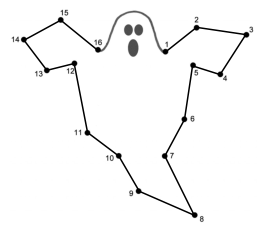

In [30]:
plt.imshow(img1, cmap='gray')
plt.plot(centers[np.argsort(total_numbers)][::, ::-1][:, 0], centers[np.argsort(total_numbers)][::, ::-1][:, 1], color='k')
plt.axis('off')

### Cat

In [31]:
img1 = cv.imread('points/cat.png',cv.IMREAD_GRAYSCALE)

In [32]:
centers, total_numbers = predict_image(img1)

In [33]:
np.sort(total_numbers)

array([ 1,  2,  3,  4,  5,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 25, 26, 27, 29, 30, 31, 32, 33, 44])

(-0.5, 1023.5, 972.5, -0.5)

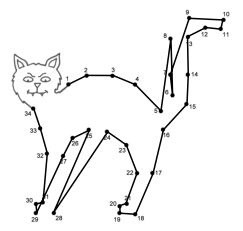

In [34]:
plt.imshow(img1, cmap='gray')
plt.plot(centers[np.argsort(total_numbers)][::, ::-1][:, 0], centers[np.argsort(total_numbers)][::, ::-1][:, 1], color='k')
plt.axis('off')

### Apple

In [35]:
img1 = cv.imread('points/apple.jpg',cv.IMREAD_GRAYSCALE)

In [36]:
centers, total_numbers = predict_image(img1)

In [37]:
np.sort(total_numbers)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

(-0.5, 566.5, 793.5, -0.5)

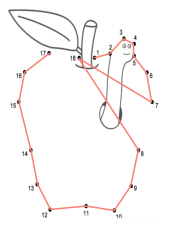

In [38]:
plt.imshow(img1, cmap='gray')
plt.plot(centers[np.argsort(total_numbers)][::, ::-1][:, 0], centers[np.argsort(total_numbers)][::, ::-1][:, 1], color='salmon')
plt.axis('off')

### Train

In [43]:
img1 = cv.imread('points/train.jpg',cv.IMREAD_GRAYSCALE)

In [44]:
centers, total_numbers = predict_image(img1)

In [45]:
np.sort(total_numbers)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 21, 25, 27, 29, 31, 33,
       36, 37])

(-0.5, 799.5, 483.5, -0.5)

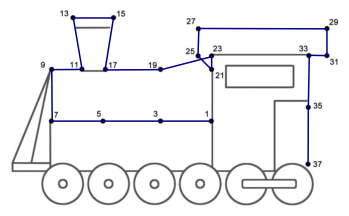

In [46]:
# plt.figure(dpi=200)
plt.imshow(img1, cmap='gray')
plt.plot(centers[np.argsort(total_numbers)][::, ::-1][:, 0], centers[np.argsort(total_numbers)][::, ::-1][:, 1], color='darkblue')
plt.axis('off')

### Saw

In [75]:
img1 = cv.imread('points/saw.jpg',cv.IMREAD_GRAYSCALE)

In [76]:
centers, total_numbers = predict_image(img1)

In [77]:
np.sort(total_numbers)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 26, 30, 31, 32,
       34, 36, 40, 42])

(-0.5, 799.5, 736.5, -0.5)

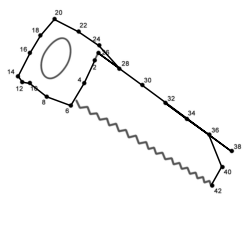

In [79]:
plt.imshow(img1, cmap='gray')
plt.plot(centers[np.argsort(total_numbers)][::, ::-1][:, 0], centers[np.argsort(total_numbers)][::, ::-1][:, 1], color='k')
plt.axis('off')

### Pumpkin

In [51]:
img1 = cv.imread('points/pumpkin.jpg',cv.IMREAD_GRAYSCALE)

In [52]:
centers, total_numbers = predict_image(img1)

In [53]:
np.sort(total_numbers)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52])

(-0.5, 799.5, 640.5, -0.5)

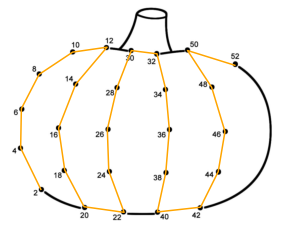

In [54]:
plt.imshow(img1, cmap='gray')
plt.plot(centers[np.argsort(total_numbers)][::, ::-1][:, 0], centers[np.argsort(total_numbers)][::, ::-1][:, 1], color='orange')
plt.axis('off')

### Dinosaur

In [55]:
img1 = cv.imread('points/dinosaur.jpg',cv.IMREAD_GRAYSCALE)

In [56]:
centers, total_numbers = predict_image(img1)

In [57]:
np.sort(total_numbers)

array([ 1,  3,  4,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31,
       33, 35, 37, 39, 41, 43, 45, 47, 49, 51])

(-0.5, 799.5, 564.5, -0.5)

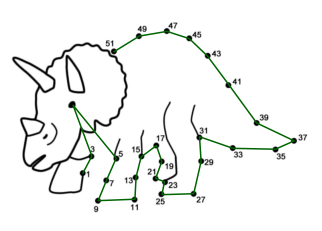

In [58]:
plt.imshow(img1, cmap='gray')
plt.plot(centers[np.argsort(total_numbers)][::, ::-1][:, 0], centers[np.argsort(total_numbers)][::, ::-1][:, 1], color='darkgreen')
plt.axis('off')

### Fails

In [82]:
img1 = cv.imread('points/volk.jpg',cv.IMREAD_GRAYSCALE)

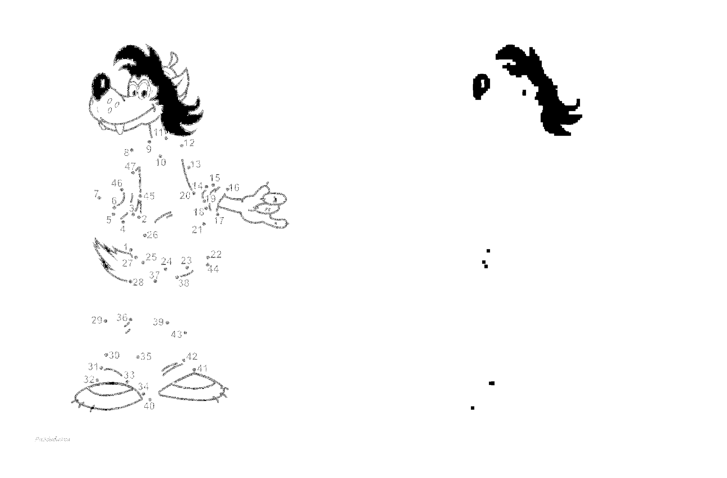

In [86]:
mask = img1 == 0
mask_int = mask.astype(np.uint8)
kernel = np.ones((7,7))
mask_int = cv.morphologyEx(mask_int, cv.MORPH_ERODE, kernel)
kernel = np.ones((11, 11))
mask_int = cv.morphologyEx(mask_int, cv.MORPH_DILATE, kernel)


plt.figure(dpi=150)
plt.subplot(1,2,1)   
plt.axis('off')
plt.imshow(1 - mask, cmap="gray")
plt.subplot(1,2,2)  
plt.axis('off')
plt.imshow(1 - mask_int, cmap="gray")

# Dotting

In [88]:
img1 = cv.imread('points/gravity.jpg',cv.IMREAD_GRAYSCALE)

(-0.5, 990.5, 699.5, -0.5)

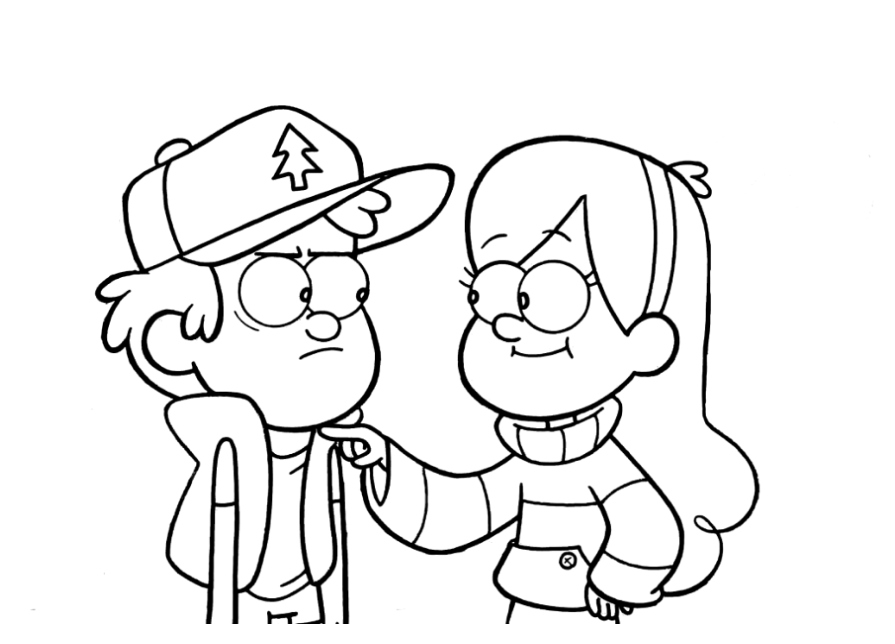

In [99]:
plt.figure(dpi=200)
plt.imshow(img1, cmap='gray')
plt.axis('off')

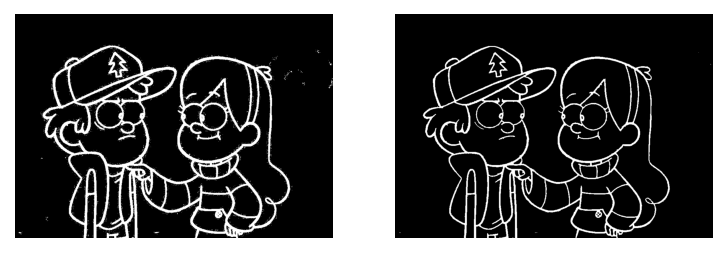

In [90]:
mask = img1 == 255
mask_int = mask.astype(np.uint8)
kernel = np.ones((3,3))
mask_int = cv.morphologyEx(mask_int, cv.MORPH_DILATE, kernel)


plt.figure(dpi=150)
plt.subplot(1,2,1)   
plt.axis('off')
plt.imshow(1 - mask, cmap="gray")
plt.subplot(1,2,2)  
plt.axis('off')
plt.imshow(1 - mask_int, cmap="gray")

In [91]:
contours, hierarchy = cv.findContours(mask_int, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [92]:
#we can compute area of each contour 
areas = (cv.contourArea(cnt) for cnt in contours)
#then exclude the first one = the whole image
areas = filter(lambda x: x[0] != 0, enumerate(areas))
#and select the largest one
cnt_id, area = max(areas, key=lambda x: x[1])

In [93]:
#Second argument specify whether shape is a closed contour (if passed True)
perimeter = cv.arcLength(contours[cnt_id], True) 

In [94]:
epsilon = 0.1 * perimeter
approx = cv.approxPolyDP(contours[cnt_id], epsilon, True)

In [95]:
def plot_dots_numbers(img, points, contours, cnt_id, contour_color=(255,255,255), contour_width=15, dots_radius=4, dots_color=(0,0,0)):
    points = np.int16(points)
    res_img = np.int16(img.copy())
    cv.drawContours(res_img, contours, cnt_id, contour_color, contour_width)
    
    mask = np.zeros_like(img)
    cv.drawContours(mask, contours, cnt_id, (255,255,255), -1)
    mask = mask == 0
    
    for i in range(len(points)):
        s = f"{i+1}"
        cv.circle(res_img, (points[i][0], points[i][1]), dots_radius, dots_color, -1)
        if np.sum(mask[points[i][0]-20:points[i][0]-10, points[i][1]-20:points[i][1]-10]) == 0:
            coords = (points[i][0]-10, points[i][1]-10)
        elif np.sum(mask[points[i][0]-10:points[i][0], points[i][1]-20:points[i][1]-10]) == 0:
            coords = (points[i][0], points[i][1]-10)
        elif np.sum(mask[points[i][0]:points[i][0]+10, points[i][1] - 20:points[i][1] - 10]) == 0:
            coords = (points[i][0]+10, points[i][1] - 10)
        elif np.sum(mask[points[i][0] - 20:points[i][0]-10, points[i][1] - 10:points[i][1]]) == 0:
            coords = (points[i][0]-10, points[i][1])
        elif np.sum(mask[points[i][0]:points[i][0]+10, points[i][1] - 10:points[i][1]]) == 0:
            coords = (points[i][0]+10, points[i][1])
        elif np.sum(mask[points[i][0]-20:points[i][0]-10, points[i][1]:points[i][1]+10]) == 0:
            coords = (points[i][0]-10, points[i][1]+10)
        elif np.sum(mask[points[i][0]-10:points[i][0], points[i][1]:points[i][1]+10]) == 0:
            coords = (points[i][0], points[i][1]+10)
        elif np.sum(mask[points[i][0]:points[i][0]+10, points[i][1]:points[i][1]+10]) == 0:
            coords = (points[i][0]+10, points[i][1]+10)
        else:
            coords = (points[i][0], points[i][1]-10)
        cv.putText(res_img, s, coords, cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)
    return res_img

(-0.5, 990.5, 699.5, -0.5)

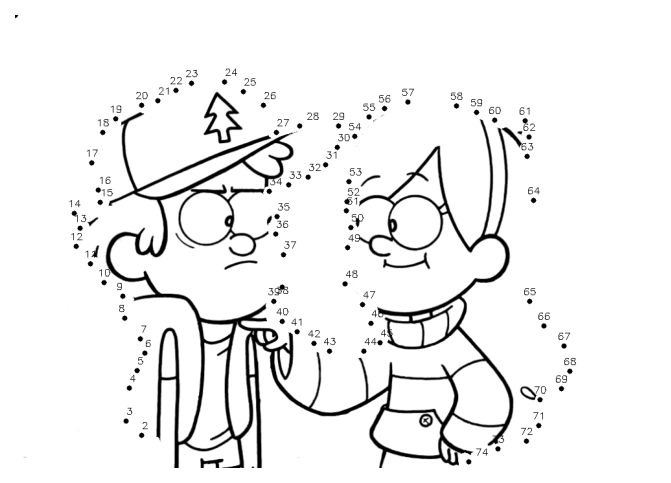

In [97]:
img_cnt = img1.copy()

res = plot_dots_numbers(img1, contours[cnt_id][:, 0, :][::20], contours, cnt_id)
res = res.astype('uint8')

plt.figure(dpi=150)
plt.imshow(res, 'gray')
plt.axis('off')

## Dot2Dot

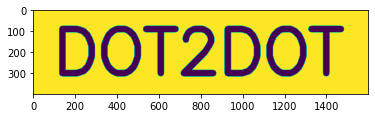

In [72]:
mask = np.ones((400, 1600))
mask = cv.putText(mask, f"DOT2DOT", (100,300), cv.FONT_HERSHEY_SIMPLEX, 10, (0,0,0), 30)
plt.imshow(mask)

In [73]:
res_img = np.zeros_like(mask)
contours, hierarchy = cv.findContours(mask.astype('uint8'), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
k = 0

for i in range(len(contours)):
    if hierarchy[0][i][-1] == 0:
        points = contours[i][:, 0, :][::50]
        
        for pt in points:
            k += 1
            res_img = cv.circle(res_img, (pt[0], pt[1]), 10, (1,1,1), -1)

(-0.5, 1599.5, 399.5, -0.5)

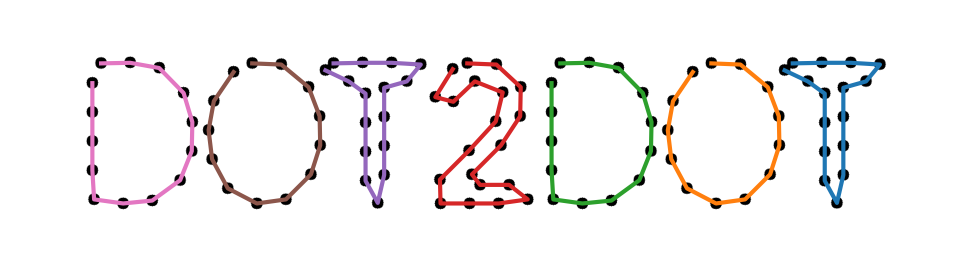

In [74]:
plt.figure(dpi=200)
plt.imshow(1-res_img, cmap='gray')
for i in range(len(contours)):
    if hierarchy[0][i][-1] == 0:
        points = contours[i][:, 0, :][::50]
        plt.plot(points[:, 0], points[:, 1])
plt.axis('off')